##Part 1:  Macro Analysis

Empirical studies indicate that changes in real estate sector mirrors the wider changes taking place in the economy at any point in time. Most of these studies put emphasis in explaining how macroeconomic variables are responsible for short and long run variations in residential property prices. According to Schmitz and Brett (2001) the economic strength of a place can be demonstrated by its macroeconomic conditions, which includes interest rates, inflation, job security, industrial productivity and stock market stability. In another study in Hong Kong, Ervi (2002), found out that the rate of return in property markets is linked to economic activities while demand for retail space is sensitive to changes in employment and local output. The author also recognizes that macroeconomic variables include unemployment, inflation rates, GDP, interest rates, balances of payments and foreign exchange rates. American economistSimon Kuznets believes real estate development has a close relationship with economicgrowth after analyzing a large amount of data of different countries. В экономической литературе приводят различные классификации факторов, влияющих на развитие рынка недвижимости: внутренние и внешние, макроэкономические и микроэкономические и т. д. В исследовании были отобраны показатели, характеризующие факторы спроса и предложения и, по мнению авторов, потенциально влияющие на удорожание жилой недвижимости: 1) цена на нефть марки Urals; 2) валовой внутренний продукт (ВВП); 3) уровень доходов населения; 4) инфляция; 5) себестоимость строительства; 6) денежная масса; 7) процентная ставка по ипотечным кредитам; 8) количество ипотечных сделок.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy.polynomial.chebyshev import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.mode.chained_assignment = None  
pd.set_option('display.max_columns', 500)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

macro.csv
test.csv
train.csv



##Initialize Data

In [3]:
read_columns= ['timestamp', 'oil_urals', 'gdp_quart_growth', 'cpi', 'usdrub', \
                'salary_growth', 'unemployment', 'average_provision_of_build_contract_moscow', 'mortgage_rate', \
                 'deposits_rate','deposits_growth','rent_price_3room_eco',\
                 'rent_price_3room_bus']
train_df = pd.read_csv("./input/train.csv",usecols=['timestamp','price_doc','full_sq'])
macro_df = pd.read_csv("./input/macro.csv",usecols=read_columns)

In [4]:
###### Service Read routines ###
def condition_train(value, col):
    vals = (macro_df[macro_df['mo_ye'] == value])
    
    ret = vals[col].asobject
  
    ret = ret[0]

    return ret

def condition_test(value, col):
    vals = (macro[macro['mo_ye'] == value])

    ret = vals[col].asobject

    ret = ret[0]

    return ret

def condition(value,col):
    vals = (macro_df[macro_df['timestamp'] == value])
    ret=vals[col].asobject
    ret=ret[0]

    return ret

def init_anlz_file():

    anlz_df = train_df
    for clmn in read_columns:
        if clmn == 'timestamp':
            continue
        anlz_df[clmn] = np.nan
        anlz_df[clmn] = anlz_df['timestamp'].apply(condition, col=clmn)
        print(clmn)
    return anlz_df

### Read Data for macro analysis
anlz_df=init_anlz_file()

oil_urals
gdp_quart_growth
cpi
usdrub
salary_growth
unemployment
average_provision_of_build_contract_moscow
mortgage_rate
deposits_rate
deposits_growth
rent_price_3room_eco
rent_price_3room_bus


##Start Analysis

In [5]:
##------------------------ SERVICE ROUTINES ----------------------------------- ###
methods=['pearson', 'kendall', 'spearman']
def plot_grouped_trends(df,feat1,feat2,corr_df):
   
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    x=df.index.values
    ch=chebfit(x,df[feat1].values,7)
    trendf1=chebval(x,ch)
    ax[0].plot(x,df[feat1].values,x,trendf1)
    ax[0].set_ylabel(feat1)
    ax[0].set_title('Chart '+feat1+' vs trend' )
    ax[0].set_xlabel('months count')
    ch2=chebfit(x,df[feat2].values,7)
    trendf2=chebval(x,ch2)
    ax[1].plot(x,df[feat2].values,x,trendf2)
    ax[1].set_ylabel(feat2)
    ax[1].set_title('Chart '+feat2+' vs trend' )
    ax[1].set_xlabel('months count')
    ##### do here two charts density distribition
    
    ls=[feat2]
    for method in methods:
        corr=df[[feat1,feat2]].corr(method=method)
        ls.append(corr[feat1][1])
    corr_df.loc[len(corr_df)]=ls
### ------------------------END SERVICE ROUTINES --------------------------------###

##Macro-economic factors influence on House pricing in Moscow

In [6]:
anlz_df['timestamp']=pd.to_datetime(anlz_df['timestamp'])
anlz_df['mo_ye']=anlz_df['timestamp'].apply(lambda x: x.strftime('%m-%Y'))
anlz_df['price_per_sqm']=anlz_df['price_doc']/anlz_df['full_sq']


macro_columns = ['price_doc','price_per_sqm','full_sq','oil_urals', 'gdp_quart_growth', 'cpi', 'usdrub', \
                'salary_growth', 'unemployment', 'average_provision_of_build_contract_moscow', 'mortgage_rate', \
                 'deposits_rate','deposits_growth','rent_price_3room_eco',\
                 'rent_price_3room_bus']
macro_df=pd.DataFrame(anlz_df.groupby('mo_ye')[macro_columns].mean())
macro_df.reset_index(inplace=True)


macro_df['mo_ye']=pd.to_datetime(macro_df['mo_ye'])
macro_df=macro_df.sort_values(by='mo_ye')


macro_df.reset_index(inplace=True)
macro_df.drop(['index'],axis=1,inplace=True)

###Show influence of economical factors on housing prices

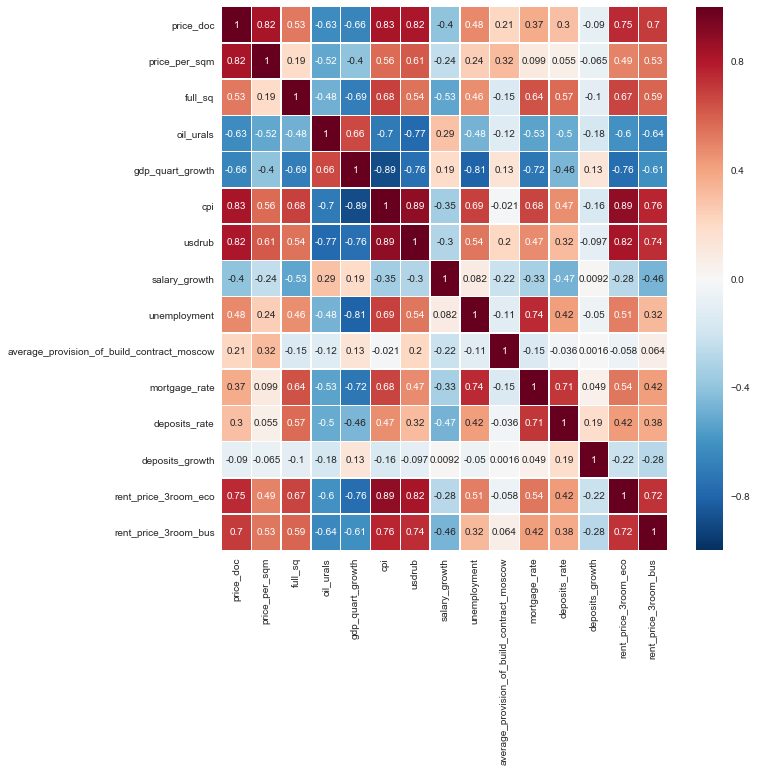

In [7]:
corr_df=pd.DataFrame(columns=['feature','pearson', 'kendall', 'spearman'])
corr=macro_df[macro_columns].corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

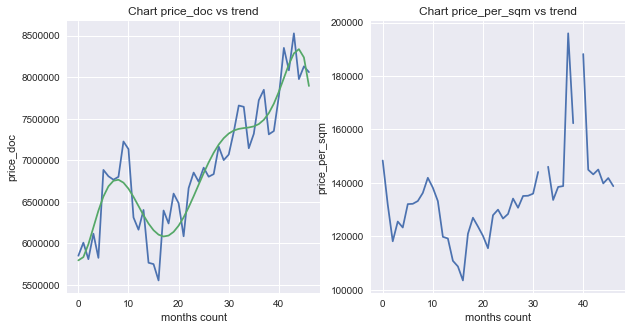

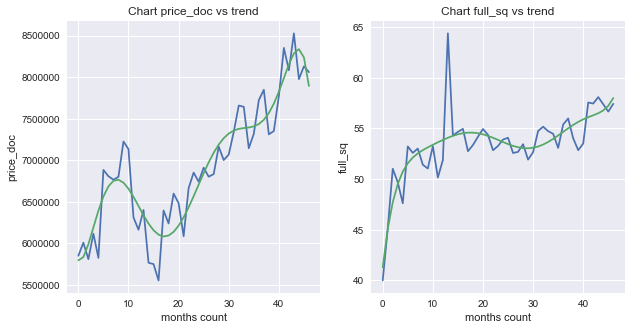

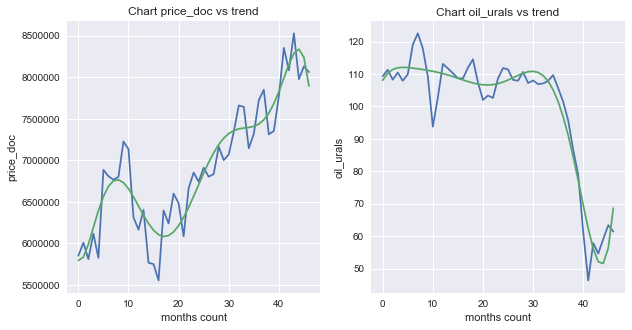

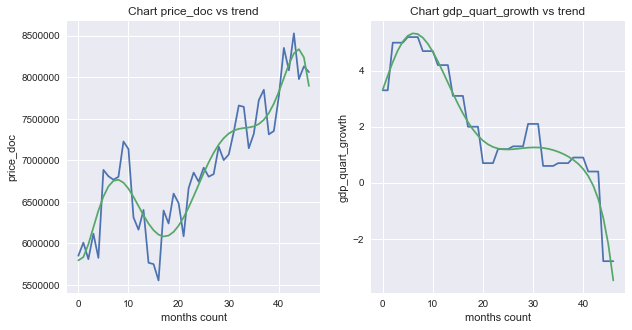

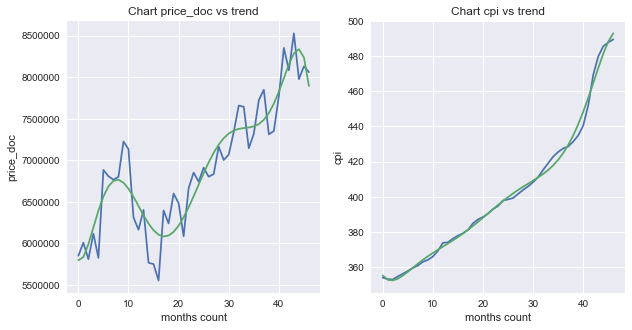

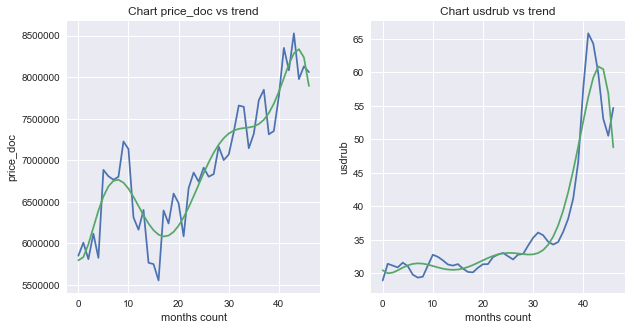

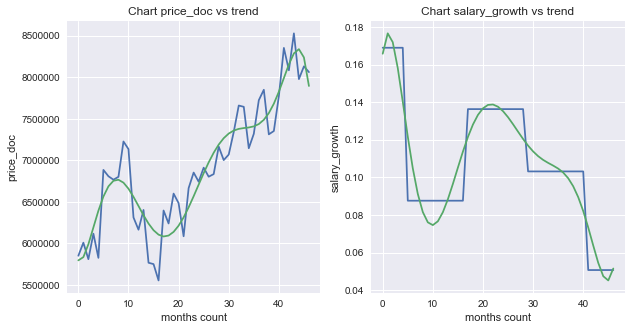

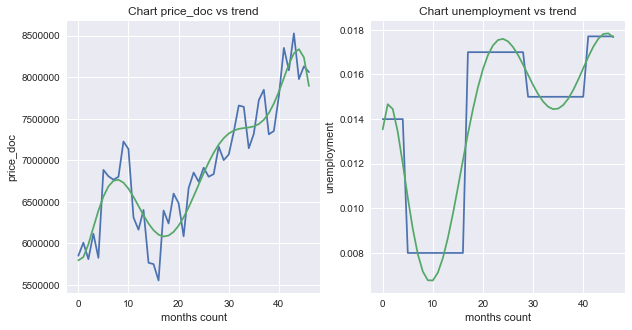

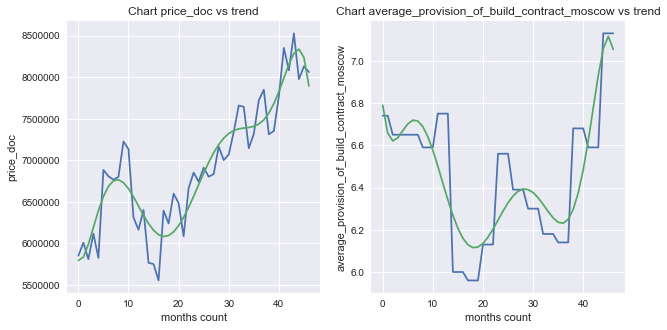

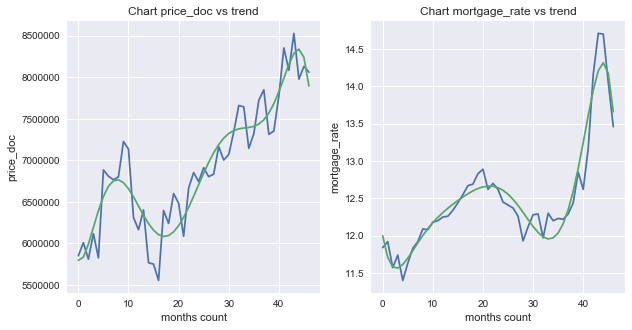

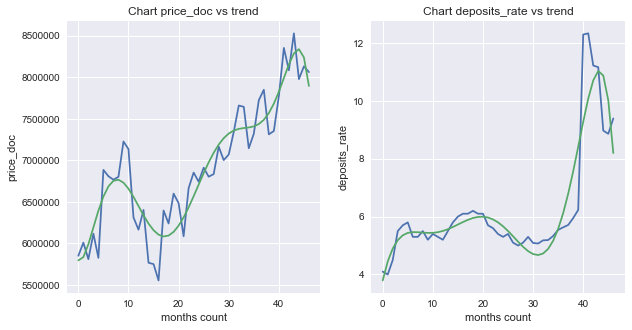

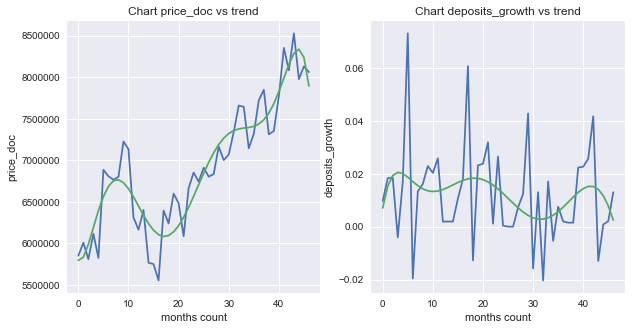

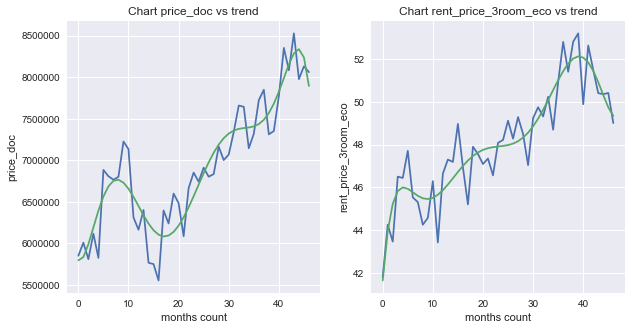

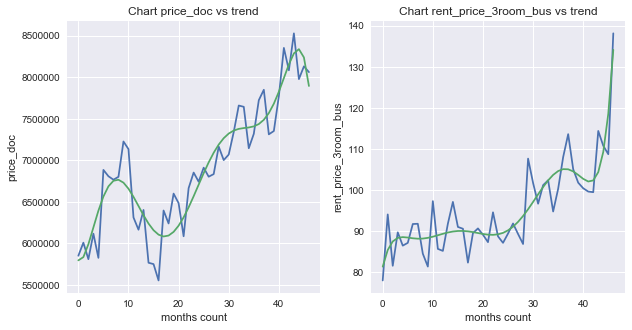

In [8]:
for feat in macro_columns:
    if (feat=='price_doc'):
        continue
    plot_grouped_trends(macro_df,'price_doc',feat,corr_df)

##Correlation Table of price_doc t by methods :'pearson', 'kendall', 'spearman'

In [9]:
print(corr_df)

                                       feature   pearson   kendall  spearman
0                                price_per_sqm  0.666916  0.682828  0.824111
1                                      full_sq  0.505648  0.415356  0.528793
2                                    oil_urals -0.720229 -0.454209 -0.630897
3                             gdp_quart_growth -0.646752 -0.475177 -0.661250
4                                          cpi  0.841482  0.661425  0.826318
5                                       usdrub  0.771286  0.648474  0.818224
6                                salary_growth -0.628264 -0.281339 -0.404361
7                                 unemployment  0.439742  0.317107  0.477906
8   average_provision_of_build_contract_moscow  0.287983  0.147633  0.213868
9                                mortgage_rate  0.584867  0.261795  0.367253
10                               deposits_rate  0.634172  0.179713  0.297560
11                             deposits_growth -0.092228 -0.062934 -0.089503

In [10]:
### Choose significant macroeconomical features by their correlation
sig_macro_columns=['oil_urals', 'gdp_quart_growth', 'cpi', 'usdrub', \
                'salary_growth', 'unemployment', 'mortgage_rate', \
                 'deposits_rate','rent_price_3room_bus']

#Part II-Data Engineenring

In [14]:

# insert in the train data and test the significant macroeconomical features by month-year data


train = pd.read_csv("./input/train.csv", parse_dates=['timestamp'])
train['mo_ye']=train['timestamp'].apply(lambda x: x.strftime('%m-%Y'))
#macro_df['mo_ye']=macro_df['mo_ye'].apply(lambda x: x.strftime('%m-%Y'))
test_df = pd.read_csv("./input/test.csv",parse_dates=['timestamp'])
test_df['mo_ye']=test_df['timestamp'].apply(lambda x: x.strftime('%m-%Y'))
macro=pd.read_csv("./input/macro.csv", parse_dates=['timestamp'])
macro['mo_ye'] = macro['timestamp'].apply(lambda x: x.strftime('%m-%Y'))

for clmn in sig_macro_columns:
    train[clmn] = train['mo_ye'].apply(condition_train, col=clmn)
    test_df[clmn] = test_df['mo_ye'].apply(condition_test, col=clmn)
  
train=train.drop(['timestamp'],1) 

  
                       

In [15]:
#free memory
del(train_df)
del(macro_df)
del(anlz_df)

In [16]:
## Initial clean train data
from sklearn import model_selection, preprocessing

x_train = train


##  Encode categirical varaibles exclude 'mo_ye'
for c in x_train.columns:
    if c=='mo_ye':
        continue
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[c].values))
        x_train[c] = lbl.transform(list(train[c].values))
x_train['mo_ye']=x_train['mo_ye'].apply(lambda x:  100*pd.to_datetime(x).year+pd.to_datetime(x).month)
x_train['price_doc']=np.log1p(x_train['price_doc'])

## Dealing with missed variables

In [17]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
        if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
x_train = DataFrameImputer().fit_transform(x_train)

##Starting importance variables evaluation

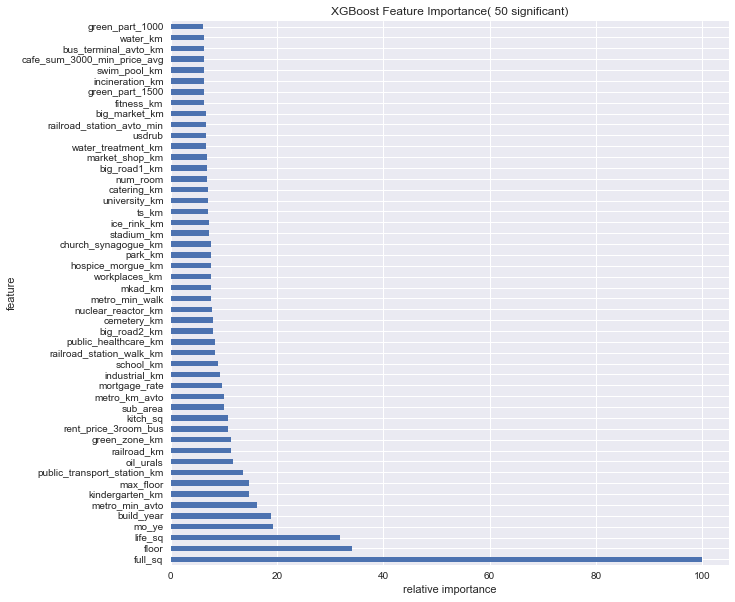

In [18]:
import operator
import xgboost as xgb
target = 'price_doc'
IDcol = 'id'

predictors = [x for x in x_train.columns if x not in [target, IDcol]]
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
train_matrix= xgb.DMatrix(x_train[predictors], x_train[target].values, feature_names=x_train[predictors].columns.values)
model = xgb.train(dict(xgb_params, silent=1), train_matrix, num_boost_round=100)
# plot the important features #
importance = model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] =100* df['fscore'] / df['fscore'].max()
df=df.sort_values(by="fscore",ascending=False)
df.head(50).plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 10))

plt.title('XGBoost Feature Importance( 50 significant)')

#plt.annotate()
plt.xlabel('relative importance')
plt.show()

## Check model accuracy according to best parameters

Best parameters are searched by GridSearchCV on my Laptop

In [19]:
from sklearn.model_selection import train_test_split
params = {

          'n_estimators': 200,
          'max_depth': 5,
          'min_child_weight': 100,
          'subsample': .9,
          'gamma': 1,
          'objective': 'reg:linear',
          'colsample_bytree': .8,

          'nthread':3,
          'silent':1,
          'seed':27
         }

train, test = train_test_split(x_train, test_size = 0.2)
predictors=df['feature'][df['fscore']>0.5].tolist() ## take predictors which score values more as 1%

[0]	train-rmse:13.6119+0.00163704	test-rmse:13.612+0.00701449
[50]	train-rmse:0.45228+0.00108066	test-rmse:0.470351+0.00293365
[100]	train-rmse:0.427279+0.00131498	test-rmse:0.460542+0.0038141
[150]	train-rmse:0.414163+0.00192797	test-rmse:0.459661+0.00396747


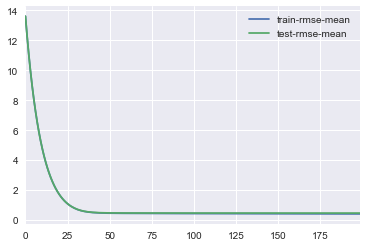

In [20]:
dtrain = xgb.DMatrix(train[predictors].values,train[target].values)
dtest = xgb.DMatrix(test[predictors].values,test[target].values)
alg=xgb.XGBClassifier(**params)
xgb_param = alg.get_xgb_params()
cvresult = xgb.cv(xgb_param, dtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=5,  
                          metrics='rmse', early_stopping_rounds=50, verbose_eval=50)

cvresult[['train-rmse-mean', 'test-rmse-mean']].plot()

#Set Model for prediction

In [21]:
from sklearn.metrics import  mean_squared_error
watchlist=[(dtrain,'train')]
num_round=600

#bst = xgb.train(params, dtrain, num_round,verbose_eval=False)
bst=xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_round)
preds = bst.predict(dtest)

err=(mean_squared_error(test[target].values, preds))
print('MSE ={}'.format(err)) # No bad

MSE =0.233385931383


#Part III Data Prediction

### Test data preparation

In [22]:

##  Encode categirical varaibles exclude 'mo_ye'
for c in test_df.columns:
    if c=='mo_ye':
        continue
    if test_df[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test_df[c].values))
        test_df[c] = lbl.transform(list(test_df[c].values))
test_df['mo_ye']=test_df['mo_ye'].apply(lambda x:  100*pd.to_datetime(x).year+pd.to_datetime(x).month)

In [23]:
#dealing with missed varaibles
test_df=test_df.drop(['timestamp'],1) 
IdClm=test_df['id']
#test_df = DataFrameImputer().fit_transform(test_df)

In [24]:
test_df = DataFrameImputer().fit_transform(test_df)

In [25]:
dtrain = xgb.DMatrix(x_train[predictors].values,x_train[target].values)
bst=xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_round)

In [26]:

dtest = xgb.DMatrix(test_df[predictors].values)
predsr = bst.predict(dtest)
predsr=np.expm1(predsr)

In [27]:
### Submiss output

output=pd.DataFrame(data={'price_doc':predsr},index=test_df['id'].values)
output.head(10)
output.to_csv('my_submission6.csv',header=True)

In [28]:
print(output.head())

       price_doc
30474  5533187.0
30475  8766425.0
30476  5409079.5
30477  6297350.0
30478  5370600.0
